## Full, Semi, and Anti Joins

In this chapter, you'll cover three more joining verbs: full-join, semi-join, and anti-join. You'll then use these verbs to answer questions about the similarities and differences between a variety of LEGO sets.

In [7]:
# load data
parts <- readRDS("parts.rds")
part_categories <- readRDS("part_categories.rds")
inventory_parts <- readRDS("inventory_parts.rds")
inventories <- readRDS("inventories.rds")
sets <- readRDS("sets.rds")
colors <- readRDS("colors.rds")
themes <- readRDS("themes.rds")

# dplyr
library(dplyr)
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 3.6.3"

### Differences between Batman and Star Wars
In the video, you compared two sets. Now, you'll compare two themes, each of which is made up of many sets.

First, you'll need to join in the themes. Recall that doing so requires going through the sets first. You'll use the inventory_parts_joined table from the video, which is already available to you in the console.

In [8]:
inventory_parts_joined <- inventories %>%
  inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
  arrange(desc(quantity)) %>%
  select(-id, -version)

# Start with inventory_parts_joined table
inventory_parts_joined %>%
  # Combine with the sets table 
  inner_join(sets, by = "set_num") %>%
  # Combine with the themes table
  inner_join(themes, by = c("theme_id" = "id"), suffix = c("_set", "_theme"))

set_num,part_num,color_id,quantity,name_set,year,theme_id,name_theme,parent_id
40179-1,3024,72,900,Personalised Mosaic Portrait,2016,277,Mosaic,276
40179-1,3024,15,900,Personalised Mosaic Portrait,2016,277,Mosaic,276
40179-1,3024,0,900,Personalised Mosaic Portrait,2016,277,Mosaic,276
40179-1,3024,71,900,Personalised Mosaic Portrait,2016,277,Mosaic,276
40179-1,3024,14,900,Personalised Mosaic Portrait,2016,277,Mosaic,276
k34434-1,3024,15,810,Lego Mosaic Tiger,2003,277,Mosaic,276
21010-1,3023,320,771,Robie House,2011,252,Architecture,NA
k34431-1,3024,0,720,Lego Mosaic Cat,2003,277,Mosaic,276
42083-1,2780,0,684,Bugatti Chiron,2018,5,Model,1
k34434-1,3024,0,540,Lego Mosaic Tiger,2003,277,Mosaic,276


### Aggregating each theme
Previously, you combined tables to compare themes. Before doing this comparison, you'll want to aggregate the data to learn more about the pieces that are a part of each theme, as well as the colors of those pieces.

The table you created previously has been preloaded for you as inventory_sets_themes. It was filtered for each theme, and the objects have been saved as batman and star_wars.

In [9]:
inventory_sets_themes <- inventory_parts_joined %>%
  inner_join(sets, by = "set_num") %>%
  inner_join(themes, by = c("theme_id" = "id"), suffix = c("_set", "_theme"))

batman <- inventory_sets_themes %>%
  filter(name_theme == "Batman")

star_wars <- inventory_sets_themes %>%
  filter(name_theme == "Star Wars")

# Count the part number and color id, weight by quantity
batman %>%
  count( part_num, color_id,, wt = quantity) 
star_wars %>%
  count( part_num, color_id, wt = quantity) 

part_num,color_id,n
10113,0,11
10113,272,1
10113,320,1
10183,57,1
10190,0,2
10201,0,1
10201,4,3
10201,14,1
10201,15,6
10201,71,4


part_num,color_id,n
10169,4,1
10197,0,2
10197,72,3
10201,0,21
10201,71,5
10247,0,9
10247,71,16
10247,72,12
10884,28,1
10928,72,6


### Full-joining Batman and Star Wars LEGO parts
Now that you've got separate tables for the pieces in the batman and star_wars themes, you'll want to be able to combine them to see any similarities or differences between the two themes. The aggregating from the last exercise has been saved as batman_parts and star_wars_parts, and is preloaded for you.

In [10]:
batman_parts <- batman %>%
  count(part_num, color_id, wt = quantity)

star_wars_parts <- star_wars %>%
  count(part_num, color_id, wt = quantity)

batman_parts %>%
  # Combine the star_wars_parts table 
  full_join(star_wars_parts, by = c("part_num", "color_id"), suffix = c("_batman", "_star_wars")) %>%
  # Replace NAs with 0s in the n_batman and n_star_wars columns 
  replace_na(list(n_batman =0, n_star_wars = 0))

part_num,color_id,n_batman,n_star_wars
10113,0,11,0
10113,272,1,0
10113,320,1,0
10183,57,1,0
10190,0,2,0
10201,0,1,21
10201,4,3,0
10201,14,1,0
10201,15,6,0
10201,71,4,5


### Comparing Batman and Star Wars LEGO parts
The table you created in the last exercise includes the part number of each piece, the color id, and the number of each piece in the Star Wars and Batman themes. However, we have more information about each of these parts that we can gain by combining this table with some of the information we have in other tables. Before we compare the themes, let's ensure that we have enough information to make our findings more interpretable. The table from the last exercise has been saved as parts_joined and is preloaded for you.

In [11]:
parts_joined <- batman_parts %>%
  full_join(star_wars_parts, by = c("part_num", "color_id"), suffix = c("_batman", "_star_wars")) %>%
  replace_na(list(n_batman = 0, n_star_wars = 0))

parts_joined %>%
  # Sort the number of star wars pieces in descending order 
  arrange(desc(n_star_wars)) %>%
  # Join the colors table to the parts_joined table
  inner_join(colors, by = c("color_id" = "id")) %>%
  # Join the parts table to the previous join 
  inner_join(parts, by = "part_num", suffix = c("_color", "_part"))

part_num,color_id,n_batman,n_star_wars,name_color,rgb,name_part,part_cat_id
2780,0,104,392,Black,#05131D,Technic Pin with Friction Ridges Lengthwise and Center Slots,53
32062,0,1,141,Black,#05131D,Technic Axle 2 Notched,46
4274,1,56,118,Blue,#0055BF,Technic Pin 1/2,53
6141,36,11,117,Trans-Red,#C91A09,Plate Round 1 x 1 with Solid Stud,21
3023,71,10,106,Light Bluish Gray,#A0A5A9,Plate 1 x 2,14
6558,1,30,106,Blue,#0055BF,Technic Pin Long with Friction Ridges Lengthwise,53
43093,1,44,99,Blue,#0055BF,Technic Axle Pin with Friction Ridges Lengthwise,53
3022,72,14,95,Dark Bluish Gray,#6C6E68,Plate 2 x 2,14
2357,19,0,84,Tan,#E4CD9E,Brick 2 x 2 Corner,11
6141,179,90,81,Flat Silver,#898788,Plate Round 1 x 1 with Solid Stud,21


### Something within one set but not another
In the videos, you learned how to filter using the semi- and anti-join verbs to answer questions you have about your data. Let's focus on the batwing dataset, and use our skills to determine which parts are in both the batwing and batmobile sets, and which sets are in one, but not the other. While answering these questions, we'll also be determining whether or not the parts we're looking at in both sets also have the same color in common.

The batmobile and batwing datasets have been preloaded for you.

In [13]:
batmobile <- inventory_parts_joined %>%
  filter(set_num == "7784-1") %>%
  select(-set_num)

batwing <- inventory_parts_joined %>%
  filter(set_num == "70916-1") %>%
  select(-set_num)

# Filter the batwing set for parts that are also in the batmobile set
batwing %>%
semi_join(batmobile, by = c("part_num"))
# Filter the batwing set for parts that aren't in the batmobile set
batwing %>%
anti_join(batmobile, by = c("part_num"))

part_num,color_id,quantity
3023,0,22
3024,0,22
3623,0,20
2780,0,17
3666,0,16
3710,0,14
6141,4,12
2412b,71,10
6141,72,10
6558,1,9


part_num,color_id,quantity
11477,0,18
99207,71,18
22385,0,14
99563,0,13
10247,72,12
2877,72,12
61409,72,12
11153,0,10
98138,46,10
2419,72,9


### What colors are included in at least one set?
Besides comparing two sets directly, you could also use a filtering join like semi_join to find out which colors ever appear in any inventory part. Some of the colors could be optional, meaning they aren't included in any sets.

The inventory_parts and colors tables have been preloaded for you.

In [15]:
# Use inventory_parts to find colors included in at least one set
colors %>%
semi_join(inventory_parts, by=c("id" = "color_id"))

id,name,rgb
-1,[Unknown],#0033B2
0,Black,#05131D
1,Blue,#0055BF
2,Green,#237841
3,Dark Turquoise,#008F9B
4,Red,#C91A09
5,Dark Pink,#C870A0
6,Brown,#583927
7,Light Gray,#9BA19D
8,Dark Gray,#6D6E5C


### Which set is missing version 1?
Each set included in the LEGO data has an associated version number. We want to understand the version we are looking at to learn more about the parts that are included. Before doing that, we should confirm that there aren't any sets that are missing a particular version.

Let's start by looking at the first version of each set to see if there are any sets that don't include a first version.

In [16]:
# Use filter() to extract version 1 
version_1_inventories <- inventories %>%
filter(version == 1)

# Use anti_join() to find which set is missing a version 1
sets %>%
anti_join(version_1_inventories, by = c("set_num"))

set_num,name,year,theme_id
40198-1,Ludo game,2018,598


### Aggregating sets to look at their differences
To compare two individual sets, and the kinds of LEGO pieces that comprise them, we'll need to aggregate the data into separate themes. Additionally, as we saw in the video, we'll want to add a column so that we can understand the percentages of specific pieces that are part of each set, rather than looking at the numbers of pieces alone.

The inventory_parts_themes table has been preloaded for you.

In [18]:
inventory_parts_themes <- inventories %>%
  inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
  arrange(desc(quantity)) %>%
  select(-id, -version) %>%
  inner_join(sets, by = "set_num") %>%
  inner_join(themes, by = c("theme_id" = "id"), suffix = c("_set", "_theme"))

batman_colors <- inventory_parts_themes %>%
  # Filter the inventory_parts_themes table for the Batman theme
  filter(name_theme == "Batman") %>%
  group_by(color_id) %>%
  summarize(total = sum(quantity)) %>%
  # Add a percent column of the total divided by the sum of the total 
  mutate(percent = total/sum(total))

# Filter and aggregate the Star Wars set data; add a percent column
star_wars_colors <- inventory_parts_themes %>%
  # Filter the inventory_parts_themes table for the Batman theme
  filter(name_theme == "Star Wars") %>%
  group_by(color_id) %>%
  summarize(total = sum(quantity)) %>%
  # Add a percent column of the total divided by the sum of the total 
  mutate(percent = total/sum(total))

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


### Combining sets
The data you aggregated in the last exercise has been preloaded for you as batman_colors and star_wars_colors. Prior to visualizing the data, you'll want to combine these tables to be able to directly compare the themes' colors.

In [19]:
batman_colors %>%
  full_join(star_wars_colors, by = "color_id", suffix = c("_batman", "_star_wars")) %>%
  replace_na(list(total_batman = 0, total_star_wars = 0)) %>%
  inner_join(colors, by = c("color_id" = "id")) %>%
  # Create the difference and total columns
  mutate(difference = percent_batman - percent_star_wars,
         total = total_batman + total_star_wars) %>%
  # Filter for totals greater than 200
  filter(total > 200)

color_id,total_batman,percent_batman,total_star_wars,percent_star_wars,name,rgb,difference,total
0,2807,0.296097046,3258,0.207172835,Black,#05131D,0.0889242116,6065
1,243,0.025632911,410,0.026071474,Blue,#0055BF,-0.0004385626,653
4,529,0.055801688,434,0.027597609,Red,#C91A09,0.0282040787,963
14,426,0.044936709,207,0.013162915,Yellow,#F2CD37,0.0317737939,633
15,404,0.042616034,1771,0.112616050,White,#FFFFFF,-0.0700000161,2175
19,142,0.014978903,1012,0.064352028,Tan,#E4CD9E,-0.0493731255,1154
28,98,0.010337553,183,0.011636780,Dark Tan,#958A73,-0.0012992271,281
36,86,0.009071730,246,0.015642884,Trans-Red,#C91A09,-0.0065711544,332
46,200,0.021097046,39,0.002479969,Trans-Yellow,#F5CD2F,0.0186170769,239
70,297,0.031329114,373,0.023718682,Reddish Brown,#582A12,0.0076104315,670


### Visualizing the difference: Batman and Star Wars
In the last exercise, you created colors_joined. Now you'll create a bar plot with one bar for each color (name), showing the difference in percentages.

Because factors and visualization are beyond the scope of this course, we've done some processing for you: here is the code that created the colors_joined table that will be used in the video.



Warning message:
"Removed 1 rows containing missing values (position_stack)."

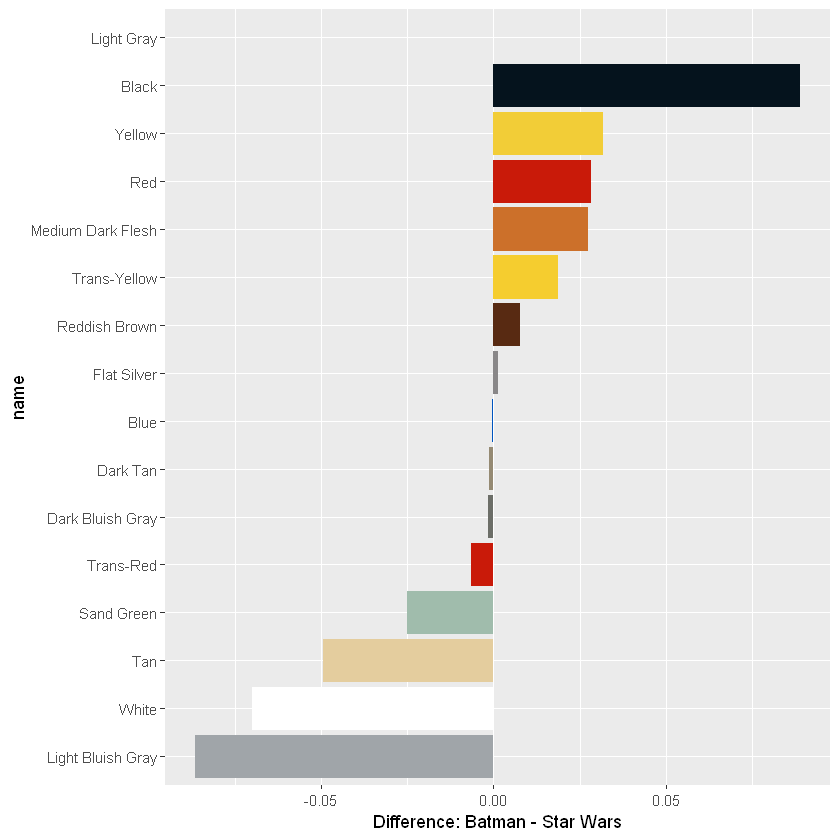

In [27]:
## libraries
# install.packages("forcast")
library(forcats)
library(ggplot2)

colors_joined <- batman_colors %>%
  full_join(star_wars_colors, by = "color_id", suffix = c("_batman", "_star_wars")) %>%
  replace_na(list(total_batman = 0, total_star_wars = 0)) %>%
  inner_join(colors, by = c("color_id" = "id")) %>%
  mutate(difference = percent_batman - percent_star_wars,
         total = total_batman + total_star_wars) %>%
  filter(total >= 200) %>%
  mutate(name = fct_reorder(name, difference)) 

color_palette <- setNames(colors_joined$rgb, colors_joined$name)

# Create a bar plot using colors_joined and the name and difference columns
ggplot(colors_joined, aes(name, difference, fill = name)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = color_palette, guide = FALSE) +
  labs(y = "Difference: Batman - Star Wars")